In [ ]:
!pip install transformers
!pip install bert-extractive-summarizer
!pip install spacy

In [ ]:
import pandas as pd

In [ ]:
#The mount function is used to connect your Google Drive to the Colab environment.
#'/content/drive' is the directory where Google Drive will be mounted. Once mounted.
# this directory will contain all the files and folders from your Google Drive.
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#It's used to read, write, and modify Excel files.
!pip install openpyxl

In [ ]:
file_path="/content/drive/My Drive/dataset_problem_statement3.xlsx"
df=pd.read_excel(file_path)
dft=pd.read_excel('/content/drive/My Drive/data.xlsx')

In [ ]:
df.sample(4)

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
276,QK,Engineer,documentation issue,0
75,QK,Manager,"Better upgrade/downgrade, boot documentation w...",0
307,QK,XYZ,Too many variants confuse customers and make i...,0
360,QK,SALES SPECIALIST.SALES,"Just about the best box we sell, with the righ...",1


In [ ]:
dft.sample(4)

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
68,DX,Manager,lack of service,NaN
47,DX,"Leader, Regionalabc","Solid product, but still very challenging comp...",NaN
14,DX,Systems Engineer,Features being developed too slowly.,NaN
34,DX,PQR,The product line of commitments missing,NaN


In [ ]:
df.rename(columns={'Product  ':'product'},inplace=True)

In [ ]:
df.columns

Index(['product', 'Job Role', 'Verbatim Feedback ',
       'Sentiment (1=Positive & 0= Negative)'],
      dtype='object')

In [ ]:
from summarizer import Summarizer,TransformerSummarizer

In [ ]:
body = '''
       Scientists say they have discovered a new species of orangutans on Indonesia’s island of Sumatra.
The population differs in several ways from the two existing orangutan species found in Sumatra and the neighboring island of Borneo.
The orangutans were found inside North Sumatra’s Batang Toru forest, the science publication Current Biology reported.
Researchers named the new species the Tapanuli orangutan. They say the animals are considered a new species because of genetic, skeletal and tooth differences.
Michael Kruetzen is a geneticist with the University of Zurich who has studied the orangutans for several years. He said he was excited to be part of the unusual discovery of a new great ape in the present day. He noted that most great apes are currently considered endangered or severely endangered.
Gorillas, chimpanzees and bonobos also belong to the great ape species.
Orangutan – which means person of the forest in the Indonesian and Malay languages - is the world’s biggest tree-living mammal. The orange-haired animals can move easily among the trees because their arms are longer than their legs. They live more lonely lives than other great apes, spending a lot of time sleeping and eating fruit in the forest.
The new study said fewer than 800 of the newly-described orangutans exist. Their low numbers make the group the most endangered of all the great ape species.
They live within an area covering about 1,000 square kilometers. The population is considered highly vulnerable. That is because the environment which they depend on is greatly threatened by development.
Researchers say if steps are not taken quickly to reduce the current and future threats, the new species could become extinct “within our lifetime.”
Research into the new species began in 2013, when an orangutan protection group in Sumatra found an injured orangutan in an area far away from the other species. The adult male orangutan had been beaten by local villagers and died of his injuries. The complete skull was examined by researchers.
Among the physical differences of the new species are a notably smaller head and frizzier hair. The Tapanuli orangutans also have a different diet and are found only in higher forest areas.
There is no unified international system for recognizing new species. But to be considered, discovery claims at least require publication in a major scientific publication.
Russell Mittermeier is head of the primate specialist group at the International Union for the Conservation of Nature. He called the finding a “remarkable discovery.” He said it puts responsibility on the Indonesian government to help the species survive.
Matthew Nowak is one of the writers of the study. He told the Associated Press that there are three groups of the Tapanuli orangutans that are separated by non-protected land.He said forest land needs to connect the separated groups.
In addition, the writers of the study are recommending that plans for a hydropower center in the area be stopped by the government.
It also recommended that remaining forest in the Sumatran area where the orangutans live be protected.
I’m Bryan Lynn.

        '''

In [ ]:
bert_model = Summarizer()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
df.rename(columns={'Sentiment (1=Positive & 0= Negative)':'Sentiment'},inplace=True)

In [ ]:
df.rename(columns={'Verbatim Feedback ':'Feedback'},inplace=True)

In [ ]:
df.sample(3)

,product,Job Role,Feedback,Sentiment
52,QK,Support,Documentation need to be improved.,1
73,QK,"Leader, Customer Executive",Many test are realetd to failures,0
234,IX,Support.CUSTOMER Executive,There are so many defects that I think they ha...,0


In [ ]:
df['product'].unique()

array(['IX', 'QK', 'DX'], dtype=object)

In [ ]:
df.shape,dft.shape

((387, 4), (130, 4))

In [ ]:
df[df['Job Role']=='Sales Specialist']

,product,Job Role,Feedback,Sentiment
3,IX,Sales Specialist,Features missing,0
6,IX,Sales Specialist,Not much deployed,0
23,QK,Sales Specialist,Waiting for more \nTime and Security feature set,1
46,QK,Sales Specialist,Good,1
86,DX,Sales Specialist,usage varied,1
120,DX,Sales Specialist,Good,1
130,DX,Sales Specialist,Excellent delivery,1
182,IX,Sales Specialist,missing features,1
184,IX,Sales Specialist,Slotting rules are very cumbersome.Too many ru...,0
252,QK,Sales Specialist,Product in good competition with lots of varia...,1


In [ ]:
len(df['Job Role'].unique()), df['product'].unique()

(55, array(['IX', 'QK', 'DX'], dtype=object))

In [ ]:
df.columns

Index(['product', 'Job Role', 'Feedback', 'Sentiment'], dtype='object')

In [ ]:
df[['product','Job Role']].groupby(['product']).apply(lambda x:' '.join(x['Job Role'].unique()))

,0
product,
DX,XYZ Architect Sales Specialist PQR Systems Eng...
IX,XYZ Architect PQR Sales Specialist Support Ope...
QK,"XYZ PQR Architect Leader, Client Executive Sal..."


In [ ]:
dfp=pd.DataFrame(df.groupby(['product'])['Job Role'].apply(lambda x:' '.join(x)))

In [ ]:
dfp.columns

Index(['Job Role'], dtype='object')

In [ ]:
dfk=pd.DataFrame(dft.groupby(['Job Role'],group_keys=False)['Verbatim Feedback '].apply(lambda x:'. '.join(x)))

In [ ]:
dfk.sample(3)

,Verbatim Feedback
Job Role,
Sales Business Development Manager,Leveraging Platform to propose customers concerns
Customer Service & Support [C],Too many failures
Engineer - Consultant [C],Lots of pressure to execute well . poor qualit...


In [ ]:
dfk=dfk.reset_index()

In [ ]:
dfk.sample(3)

,Job Role,Verbatim Feedback
3,Customer Service & Support [C],Too many failures
10,Manager,Had several issues. Better feature and edge ro...
0,Architect,documantation is wrong . lack of features . T...


In [ ]:
dfk.columns = ['job', 'feedback']

In [ ]:
dfk.sample(3)

,job,feedback
19,Systems Engineer,Resiliency.. Features being developed too slow...
18,Support,Need new version. life changing product. Very ...
5,Engineer - Consultant [C],Lots of pressure to execute well . poor qualit...


In [ ]:
dfk.iloc[2,1]

'Lot more SW issues/bugs compared to competitors, SW needs to be improved a lot'

In [ ]:
dfk['feedback'][2]

'Lot more SW issues/bugs compared to competitors, SW needs to be improved a lot'

In [ ]:
body = dfk['feedback'][2]
''.join(bert_model(body, max_length=20, min_length=10))

''

In [ ]:
body

'Lot more SW issues/bugs compared to competitors, SW needs to be improved a lot'

In [ ]:
df['Job Role'].value_counts()

,count
Job Role,
Architect,60
Support,54
XYZ,28
Engineer,22
Architect.SALES,19
PQR,18
Manager,16
Support.CUSTOMER Executive,14
Sales Specialist,12


In [ ]:
dft['Job Role'].value_counts()

,count
Job Role,
Architect,31
Engineer,20
Support,11
XYZ,10
Manager,9
Systems Engineer,8
Sales Specialist,6
PQR,6
Operations,5


In [ ]:
dft

,Product,Job Role,Verbatim Feedback,Sentiment (1=Positive & 0= Negative)
0,DX,Operations,software releases are always late. Customer-fa...,NaN
1,DX,Architect,documantation is wrong,NaN
2,DX,Sales Specialist,Nice platform- well managed- not perfect-,NaN
3,DX,Architect,lack of features,NaN
4,DX,Sales Specialist,Very good Support from BU,NaN
...,...,...,...,...
125,DX,Engineer - Consultant [C],Nice price/performance.\n,NaN
126,DX,Support,This product is a big change will make more cu...,NaN
127,DX,Manager,Insufficient troubleshooting capabilities and ...,NaN
128,DX,Engineer - Consultant [C],"Its interesting,",NaN


In [ ]:
df.columns

Index(['product', 'Job Role', 'Feedback', 'Sentiment'], dtype='object')

In [ ]:
df['Feedback'][0]

'There is no  maintenance menu'

In [ ]:
df

,product,Job Role,Feedback,Sentiment
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
#It's a library that helps in creating and using sentence embeddings, which are numerical representations of sentences.
# These embeddings are useful in tasks like comparing the meanings of sentences, finding similar sentences, and more.
!pip install -U sentence-transformers

In [ ]:
#This tool helps you work with sentences by turning them into embeddings, which are like numerical representations of
# sentences.

from sentence_transformers import SentenceTransformer
#This is a smaller, faster model designed to take a sentence and turn it into a set of numbers (an embedding)
#that captures the meaning of the sentence.
model = SentenceTransformer('all-MiniLM-L6-v2')

In [ ]:
embedding=model.encode(['i am very clever person','ypu are very clever person'])


In [ ]:
model.similarity(embedding[0],embedding[1])

tensor([[0.6024]])

In [ ]:
embedding.shape

(2, 384)

#####In machine learning and deep learning, data is often represented as tensors because they can handle large amounts of information in multiple dimensions. TensorFlow and PyTorch, which are popular libraries for deep learning, are named after tensors because they heavily rely on them to perform computations.

In [ ]:
import numpy as np
x=np.array(df['Feedback'])
y=np.array(df['Sentiment'])

In [ ]:
type(x),type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# import numpy as np
# X = np.array(dftr['Verbatim Feedback '])
# y = dftr['Sentiment (1=Positive & 0= Negative)']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train_, X_test_, y_train, y_test = train_test_split(x, y, test_size = 0.2)
X_train = model.encode(X_train_)
X_test = model.encode(X_test_)

In [ ]:
type(y_test)

numpy.ndarray

In [ ]:
X_test.shape,X_train.shape

((78, 384), (309, 384))

In [ ]:
#Imagine you have a text file that contains a list of numbers representing the heights of students in a class.
#You can use loadtxt to read these numbers into Python.
from numpy import loadtxt
#XGBoost is a powerful tool for creating models that can make predictions. The XGBClassifier is specifically used
# for classification tasks, where you want to predict a category or class, like whether an email is spam or not.
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
#Suppose you want to create a model to predict whether a student will pass or fail based on their study hours.
#You have data on 100 students. You use numpy to load the data, XGBoost to create the prediction model,
#train_test_split to divide your data for training and testing, and accuracy_score to see how well your model works.

In [ ]:
# fit model for training data
model=XGBClassifier()
model.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
y_test

array([0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1])

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.79      0.83        43
           1       0.77      0.86      0.81        35

    accuracy                           0.82        78
   macro avg       0.82      0.82      0.82        78
weighted avg       0.83      0.82      0.82        78



#####The harmonic mean (used in the F1 score) is chosen because it balances precision and recall more effectively, highlighting any weaknesses in the model's predictions. This makes it a better metric when the goal is to achieve a good balance between precision and recall, especially in cases where they differ significantly.

In [ ]:
#vaderSentiment helps you understand whether a piece of text is positive, negative, or neutral, and how strong these sentiments are.
!pip install vaderSentiment

####The analyzer.polarity_scores(text) function will return a dictionary with scores for different types of sentiment:

positive: How positive the text is.
neutral: How neutral the text is.
negative: How negative the text is.
compound: An overall score that summarizes the sentiment.
The polarity score ranges from -1 to 1. A score of -1 means the words are super negative, like “disgusting” or “awful.” A score of 1 means the words are super positive, like “excellent” or “best.”

In [ ]:
#import the library
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#calculate the negative, positive, neutral and compound scores, plus verbal evaluation
def sentiment_vader(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    sentiment_dict = sid_obj.polarity_scores(sentence)
    negative = sentiment_dict['neg']
    neutral = sentiment_dict['neu']
    positive = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    if sentiment_dict['compound'] >= 0.05 :
        overall_sentiment = 1

    elif sentiment_dict['compound'] <= - 0.05 :
        overall_sentiment = -1

    else :
        overall_sentiment = 0

    return negative, neutral, positive, compound, overall_sentiment

In [ ]:
print(df['Feedback'].apply(sentiment_vader),df['Feedback'])

0       (0.355, 0.645, 0.0, -0.296, -1)
1               (0.0, 1.0, 0.0, 0.0, 0)
2               (0.0, 1.0, 0.0, 0.0, 0)
3       (0.688, 0.312, 0.0, -0.296, -1)
4               (0.0, 1.0, 0.0, 0.0, 0)
                     ...               
382             (0.0, 1.0, 0.0, 0.0, 0)
383             (0.0, 1.0, 0.0, 0.0, 0)
384             (0.0, 1.0, 0.0, 0.0, 0)
385    (0.365, 0.635, 0.0, -0.3182, -1)
386             (0.0, 1.0, 0.0, 0.0, 0)
Name: Feedback, Length: 387, dtype: object 0                          There is no  maintenance menu
1                                            Very buggy.
2                              High quality -  standards
3                                       Features missing
4                            how to do the inter-working
                             ...                        
382                                    uninteresting GUI
383                                    UI is interactive
384    Totally instable.. Enginieering quallity has d...
385 

In [ ]:
df

,product,Job Role,Feedback,Sentiment
0,IX,XYZ,There is no maintenance menu,0
1,IX,Architect,Very buggy.,0
2,IX,PQR,High quality - standards,1
3,IX,Sales Specialist,Features missing,0
4,IX,Architect,how to do the inter-working,0
...,...,...,...,...
382,QK,TECHNICAL LEADER.CUSTOMER Executive,uninteresting GUI,0
383,QK,Engineer - Customer Support,UI is interactive,1
384,QK,TECHNICAL LEADER.CUSTOMER Executive,Totally instable.. Enginieering quallity has d...,0
385,QK,Support.CUSTOMER Executive,Lack of work around this,0


In [ ]:
!pip install happytransformer

In [ ]:
from happytransformer import HappyTextClassification

In [ ]:
happy_tc = HappyTextClassification(model_type="DISTILBERT", model_name="distilbert-base-uncased-finetuned-sst-2-english", num_labels=2)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [ ]:
result = happy_tc.classify_text("hello")

In [ ]:
result.label

'POSITIVE'

In [ ]:
dft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Product                               130 non-null    object 
 1   Job Role                              130 non-null    object 
 2   Verbatim Feedback                     130 non-null    object 
 3   Sentiment (1=Positive & 0= Negative)  0 non-null      float64
dtypes: float64(1), object(3)
memory usage: 4.2+ KB


In [ ]:
df['prd'] = df['Feedback'].apply(happy_tc.classify_text)

In [ ]:
df['prd'] = df['prd'].apply(lambda x:1 if x.label[0]=='P' else 0)

In [ ]:
df[df['Job Role']=='Support']

,product,Job Role,Feedback,Sentiment,prd
9,IX,Support,The problem has always been constant.,0,0
13,IX,Support,Some ongoing issues so far.Few issues reporte...,0,0
14,IX,Support,There are many bugs that make it difficult to ...,0,0
15,IX,Support,lacks of documentation of unSupported features...,0,0
50,QK,Support,The image of a certain customer getting angry ...,0,0
51,QK,Support,Good delivery,1,1
52,QK,Support,Documentation need to be improved.,1,0
58,QK,Support,Scalable deal,1,1
64,QK,Support,I cannot apply workaround,0,0
67,QK,Support,There are many bugs that make it difficult to ...,0,0


In [ ]:
print(classification_report(df['Sentiment'], df['prd']))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       213
           1       0.86      0.78      0.82       174

    accuracy                           0.84       387
   macro avg       0.85      0.84      0.84       387
weighted avg       0.84      0.84      0.84       387



In [ ]:
df['product'].unique()

array(['IX', 'QK', 'DX'], dtype=object)

In [ ]:
st=('. '.join(df[(df['prd']==0) & (df['product']=='IX') & (df['Job Role']=='Support')]['Feedback']))
# st = ('. '.join(df[(df['prd']==0) & (df['product']=='IX') & (df['Job Role']=='Support')]['Feedback']))

In [ ]:
st

'The problem has always been constant..  Some ongoing issues so far.Few issues reported so far on customer.. There are many bugs that make it difficult to determine whether it is software or hardware. lacks of documentation of unSupported features and features combinations. . We found a HW issue. Could be SW.There is a lot of doc. It would be good to centralized.. needs to test this boxes properly. Very poor drop accounting and troubleshooting capabilities.  Support is pretty much guess work and relying on other boxes in the network to provide the missing clues.. good product with enhanced Architecture , but this product also needs time to become as stable. I think there are still bugs that can only be considered lack of testing. Both software and hardware should be  improve..  defective hardware. not many issue observednew product not seen much used by customer.  So many feature and command are not Support making it a very difficult product to troubleshoot. Lack of serviceability and 

In [ ]:
!pip install matplotlib
!pip install pandas
!pip install wordcloud

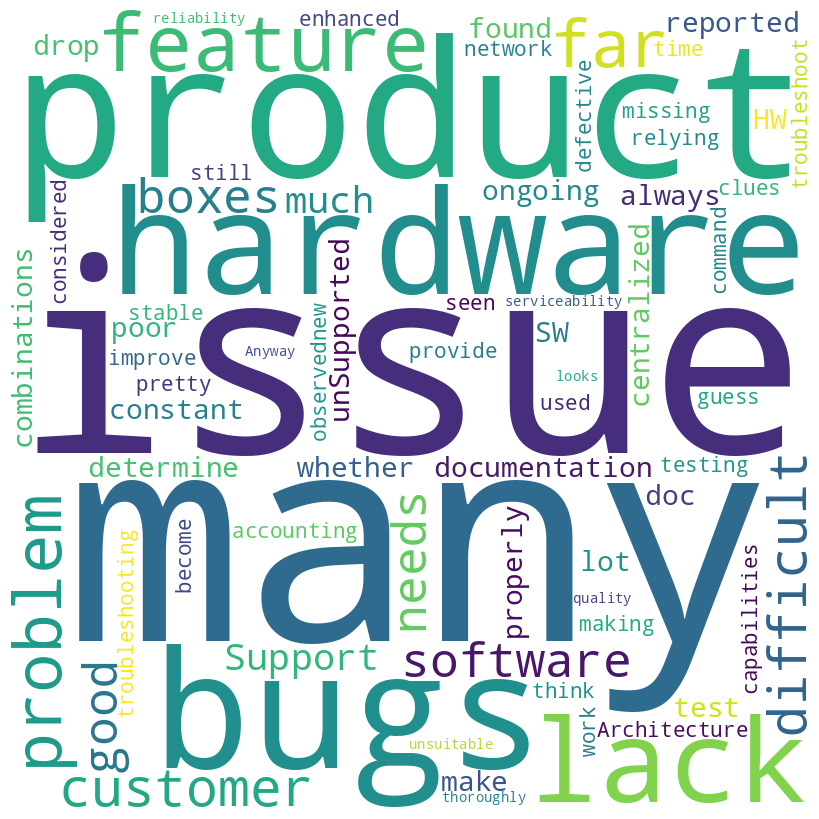

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(st)
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
bert_summary = ''.join(bert_model(st, min_length=10))
print(bert_summary)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The problem has always been constant..  Some ongoing issues so far. Support is pretty much guess work and relying on other boxes in the network to provide the missing clues.. good product with enhanced Architecture , but this product also needs time to become as stable. not many issue observednew product not seen much used by customer. Lack of serviceability and reliability.


In [ ]:
st = ''.join(st.split('. '))

In [ ]:
bert_summary = bert_model(st,min_length=10)
print(bert_summary)

The problem has always been constant..  Some ongoing issues so far. Support is pretty much guess work and relying on other boxes in the network to provide the missing clues.. good product with enhanced Architecture , but this product also needs time to become as stable. not many issue observednew product not seen much used by customer. Lack of serviceability and reliability.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


RATINGS


In [ ]:
import nltk
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(sentence):

    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()

    # polarity_scores method of SentimentIntensityAnalyzer
    # oject gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    return sentiment_dict['compound']

In [ ]:
print(df['Feedback'],df['Feedback'].apply(lambda x:sentiment_scores(x)))

0                          There is no  maintenance menu
1                                            Very buggy.
2                              High quality -  standards
3                                       Features missing
4                            how to do the inter-working
                             ...                        
382                                    uninteresting GUI
383                                    UI is interactive
384    Totally instable.. Enginieering quallity has d...
385                             Lack of work around this
386    The platform is been wide deploy This trigger ...
Name: Feedback, Length: 387, dtype: object 0     -0.2960
1      0.0000
2      0.0000
3     -0.2960
4      0.0000
        ...  
382    0.0000
383    0.0000
384    0.0000
385   -0.3182
386    0.0000
Name: Feedback, Length: 387, dtype: float64


In [ ]:
d=df[df['Job Role'] == 'Operations']
s=d['Feedback'].apply(lambda x:sentiment_scores(x))
z=s.reset_index(level=None, drop=True, name=None, inplace=False)
rating=0
for i in range(z.count()):
  rating=rating+z[i]
rating =rating/z.count()
rating*5
print(rating)

## Lowest rating 0 and highest rating 5 ##

0.048175000000000016


above algorithm do not give accurate rating

In [ ]:
m=dft['Job Role'].unique()
print(m)

['Operations' 'Architect' 'Sales Specialist' 'Systems Engineer'
 'Solutions' 'PrincipalabcArchitect' 'PQR' 'XYZ' 'Support'
 'Engineer - Consultant [C]' 'Manager' 'Engineer' 'Leader, Regionalabc'
 'Sales Business Development Manager' 'Leader, Client Executive'
 'Business SolutionsArchitect' 'Leader, Customer Executive'
 'SecurityCustomer Success Executive' 'High Touch Operations Manager'
 'CXO' 'Customer Service & Support [C]']


In [ ]:
m=['Operations']
for name in m:
  d=dft[dft['Job Role'] == name]
  print('d',d)
  s=d['Verbatim Feedback '].apply(lambda x:sentiment_scores(x))
  print('s',s)
  z=s.reset_index(level=None, drop=True, name=None, inplace=False)
  print('z',z)
  rating=0
  for i in range(z.count()):
    rating=rating+z[i]
    print('rating',rating)
  round_rating=round(rating,2)
  print('round_rating',round_rating)
  if z.count()>0:
    rating =rating/z.count()
    print('rating',rating)
    norm_rate=((rating+1)/2)*5
    print(name, ": ", norm_rate)
  else:
    print(name,": ", 2.5)

## Lowest rating 0 and highest rating 5 ##

d     Product      Job Role                                 Verbatim Feedback   \
0          DX  Operations  software releases are always late. Customer-fa...   
96         DX  Operations                            SW quality is a concern   
100        DX  Operations                                     Too many bugs    
102        DX  Operations                                        easy to use   
105        DX  Operations                           Moderate service quality   

     Sentiment (1=Positive & 0= Negative)  
0                                     NaN  
96                                    NaN  
100                                   NaN  
102                                   NaN  
105                                   NaN  
s 0     -0.3612
96     0.0000
100    0.0000
102    0.4404
105    0.0000
Name: Verbatim Feedback , dtype: float64
z 0   -0.3612
1    0.0000
2    0.0000
3    0.4404
4    0.0000
Name: Verbatim Feedback , dtype: float64
rating -0.3612
rating -0.3612
rating 

In [ ]:
m=dft['Job Role'].unique()
# print(m)
for name in m:
  d=dft[dft['Job Role'] == name]
  # print('d',d)
  s=d['Verbatim Feedback '].apply(lambda x:sentiment_scores(x))
  # print('s',s)
  z=s.reset_index(level=None, drop=True, name=None, inplace=False)
  # print('z',z)
  rating=0
  for i in range(z.count()):
    rating=rating+z[i]
    # print('rating',rating)
  round_rating=round(rating,2)
  # print('round_rating',round_rating)
  if z.count()>0:
    rating =rating/z.count()
    # print('rating',rating)
    norm_rate=((rating+1)/2)*5
    print(name, ": ", norm_rate)
  else:
    print(name,": ", 2.5)

## Lowest rating 0 and highest rating 5 ##

Operations :  2.5396
Architect :  2.4968629032258063
Sales Specialist :  3.4439583333333337
Systems Engineer :  3.14071875
Solutions :  3.0776
PrincipalabcArchitect :  3.0334166666666667
PQR :  2.5637916666666665
XYZ :  2.544525
Support :  2.7067727272727273
Engineer - Consultant [C] :  2.7005625
Manager :  2.6000833333333335
Engineer :  2.8315625
Leader, Regionalabc :  2.7043749999999998
Sales Business Development Manager :  2.5
Leader, Client Executive :  4.09225
Business SolutionsArchitect :  2.7567500000000003
Leader, Customer Executive :  1.1936250000000002
SecurityCustomer Success Executive :  2.5
High Touch Operations Manager :  1.9313749999999998
CXO :  3.6917500000000003
Customer Service & Support [C] :  1.353
